# Psychophysics - Analyse des données
On va faire une regression logistique des données obtenues en psychophysiques, pour chercher le seuil B_theta vers lequel les gens perdent en performances. On le comparera ensuite qualitativement au performances du modèle pour essayer de valider sa plausibilité neurobiologique. 

In [84]:
import pickle
subj_name_list =  ['PA', 'DL', 'HL', 'MP']
subj_data_list = []

for subject in subj_name_list :
    x = pickle.load(open('Psychophys_outlist_subj%s.p'%subject, 'rb'))
    subj_data_list.append(x)

En utilisant le modèle de régression logistique de scikit-learn, on fait un modèle pour chaque sujet :

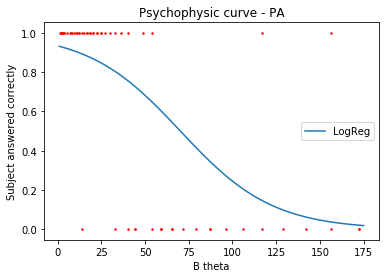

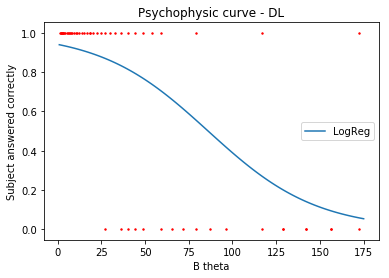

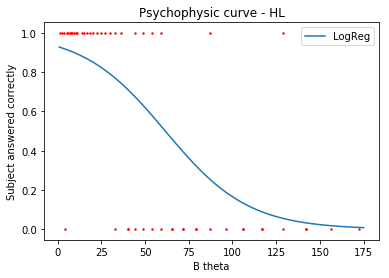

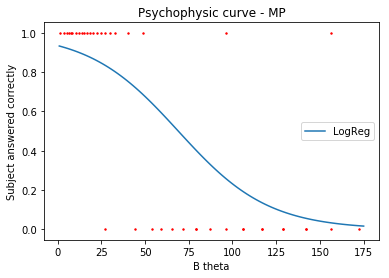

In [85]:
from sklearn.linear_model import LogisticRegression
import numpy as np

#the values used for plotting once the model is built
x_values = np.linspace(1, 175, 100)
x_plot = np.reshape(x_values, (100,1))

for num, subj_data in enumerate(subj_data_list) :
    X = []
    for i in subj_data :
        X.append(i[0])

    y =[]
    for i in subj_data :
        y.append(i[1])
    
    #reshaped for fitting
    X = np.asarray(X)
    X = X[:,np.newaxis]
    
    #logistic regression
    lgs = LogisticRegression(C = 3, max_iter = 100, penalty = 'l1' ,class_weight = {1 : 1.5 , 0 : 1}) 
    lgs.fit(X, y)
    y_values = lgs.predict_proba(x_plot)[:,1]
    plt.plot(x_values, y_values, label = 'LogReg')

    plt.scatter(X, y, c='r', s=2)
    plt.title('Psychophysic curve - %s' % subj_name_list[num])
    plt.xlabel("B theta")
    plt.ylabel("Subject answered correctly")
    plt.legend()
    plt.show()

On peut aussi faire un modèle global qui moyenne toutes les données :

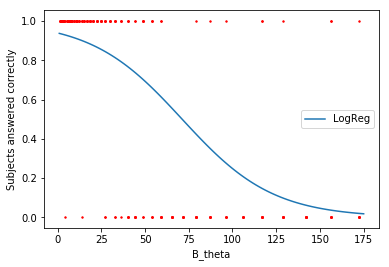

In [87]:
from sklearn.linear_model import LogisticRegression
import numpy as np

#the values used for plotting once the model is built
x_values = np.linspace(1, 175, 100)
x_plot = np.reshape(x_values, (100,1))

#get all subject variables
merged_X = []
merged_y = []
for subj_data in subj_data_list :
    X = []
    for i in subj_data :
        X.append(i[0])
    merged_X+=X
                    
for subj_data in subj_data_list :
    y =[]
    for i in subj_data :
        y.append(i[1])
    
    merged_y+=y
    
#reshaped for fitting
X = np.asarray(merged_X)
X = X[:,np.newaxis]

#logistic regression
lgs = LogisticRegression(C = 3, max_iter = 100, penalty = 'l1' ,class_weight = {1 : 1.5 , 0 : 1}) 
lgs.fit(X, merged_y)
y_values = lgs.predict_proba(x_plot)[:,1]
plt.plot(x_values, y_values, label = 'LogReg')

plt.scatter(X, merged_y, c='r', s=2)
plt.xlabel("B_theta")
plt.ylabel("Subjects answered correctly")
plt.legend()
plt.show()